In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.vector_ar.vecm import coint_johansen

import sklearn.preprocessing
import pandas as pd
import numpy as np
import datetime
import tqdm #progress bar
import talib
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller # for our Dicky Fuller tests.

In [2]:
data = pd.read_csv("data/New data/1222_SP.csv") #2768
data1 = pd.read_csv("data/New data/1222_CL.csv").dropna() #data7-2768
data2 = pd.read_csv("data/New data/1222_OVX.csv").dropna() # 2768
data3 = pd.read_csv("data/New data/1222_GC.csv").dropna() #data8-2766
data4 = pd.read_csv("data/New data/1222_GVZ.csv").dropna() #2768
data5 = pd.read_csv("data/New data/1222_DXY.csv").dropna() #2770
data6 = pd.read_csv("data/New data/1222_DX.csv").dropna() #2769

In [3]:
data7= data1[data1['Open']!='-']
data8= data3[data3['Open']!='-']

In [4]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 2769
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2764 non-null   object 
 1   Open       2764 non-null   float64
 2   High       2764 non-null   float64
 3   Low        2764 non-null   float64
 4   Close      2764 non-null   float64
 5   Adj Close  2764 non-null   float64
 6   Volume     2764 non-null   float64
dtypes: float64(6), object(1)
memory usage: 172.8+ KB


In [5]:
sns.set()
%matplotlib inline
Date = data.get("Date")
Date = pd.to_datetime(Date,format='%d-%m-%Y')
Open = data.get("Open")
High = data.get("High")
Low = data.get("Low")
Close = data.get("Close")
Close_cl = data7.get("Close")
Close_ovx = data2.get("Close")
Close_gc = data8.get("Close")
Close_gvz = data4.get("Close")
Close_dxy = data5.get("Close")
Close_dx = data6.get("Close")

dict = {"Date": Date,
        "open": Open,
        "high": High,
        "low": Low, 
        "close": Close,
        "close_cl": Close_cl, 
        "close_ovx": Close_ovx,
        "close_gc": Close_gc, 
        "close_gvz": Close_gvz,
        "close_dx": Close_dx, 
        "close_xyz": Close_dxy,
        "return":0,
       }
df = pd.DataFrame(dict)
df.set_index('Date', inplace=True)
df = df.dropna()
print("Total number of trading time points:%d" % (len(Date)))
print("The number of trading time points remaining after removing the blank value:%d" % (len(df)))
df

Total number of trading time points:2764
The number of trading time points remaining after removing the blank value:2271


,open,high,low,close,close_cl,close_ovx,close_gc,close_gvz,close_dx,close_xyz,return
Date,,,,,,,,,,,
2012-01-04,1277.03,1278.73,1268.10,1277.30,103.22,39.040001,1611.9,22.080000,80.425003,79.610001,0
2012-01-05,1277.30,1283.05,1265.26,1281.06,101.81,38.700001,1619.4,22.340000,81.250000,80.089996,0
2012-01-06,1280.93,1281.84,1273.34,1277.81,101.56,37.119999,1616.1,21.299999,81.597000,80.940002,0
2012-01-09,1277.83,1281.99,1274.55,1280.70,101.31,36.520000,1607.5,21.469999,81.388000,81.239998,0
2012-01-11,1292.02,1293.80,1285.41,1292.48,100.87,35.520000,1639.2,22.340000,81.613998,81.050003,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,3853.26,3853.26,3764.49,3822.39,77.28,41.799999,1780.5,14.880000,104.531998,91.199997,0
2022-12-23,3815.11,3845.80,3797.01,3844.82,76.11,41.209999,1813.9,14.860000,104.661003,91.120003,0
2022-12-27,3843.34,3846.65,3813.22,3829.25,74.29,43.500000,1807.5,16.299999,104.595001,91.529999,0


In [6]:
df1= df.sort_values(by='Date')
print(df1)

               open     high      low    close close_cl  close_ovx close_gc  \
Date                                                                          
2012-01-04  1277.03  1278.73  1268.10  1277.30   103.22  39.040001   1611.9   
2012-01-05  1277.30  1283.05  1265.26  1281.06   101.81  38.700001   1619.4   
2012-01-06  1280.93  1281.84  1273.34  1277.81   101.56  37.119999   1616.1   
2012-01-09  1277.83  1281.99  1274.55  1280.70   101.31  36.520000   1607.5   
2012-01-11  1292.02  1293.80  1285.41  1292.48   100.87  35.520000   1639.2   
...             ...      ...      ...      ...      ...        ...      ...   
2022-12-22  3853.26  3853.26  3764.49  3822.39    77.28  41.799999   1780.5   
2022-12-23  3815.11  3845.80  3797.01  3844.82    76.11  41.209999   1813.9   
2022-12-27  3843.34  3846.65  3813.22  3829.25    74.29  43.500000   1807.5   
2022-12-28  3829.56  3848.32  3780.78  3783.22    75.19  43.950001   1777.2   
2022-12-30  3829.06  3839.85  3800.34  3839.50    78

In [7]:
df1['close_gc'] = pd.to_numeric(df1['close_gc'],errors = 'coerce')
df1['close_cl'] = pd.to_numeric(df1['close_cl'],errors = 'coerce')

Text(0, 0.5, 'Value(USD)')

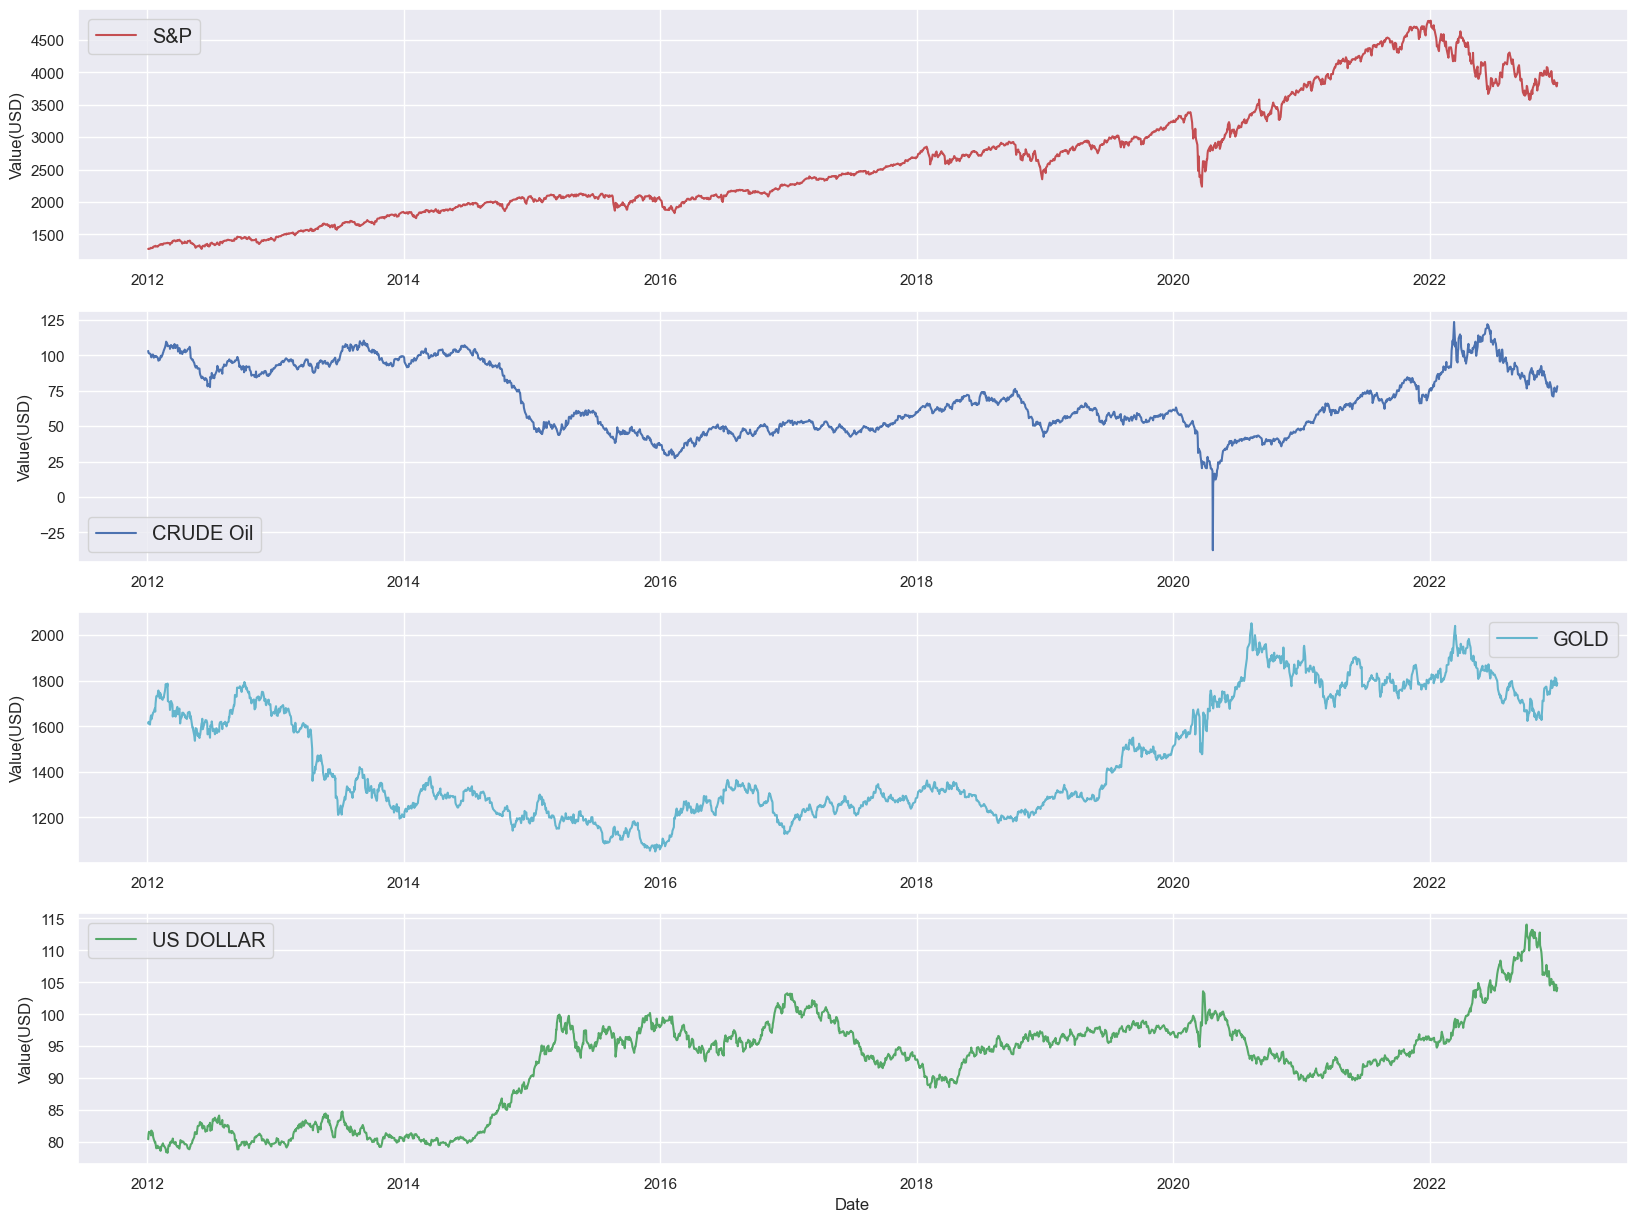

In [8]:
plt.figure(figsize=(20,15))
plt.subplot(411)
plt.plot(df1['close'], label='S&P', color='r')
plt.legend(loc='best', fontsize='large')
plt.ylabel('Value(USD)')
plt.subplot(412)
plt.plot(df1['close_cl'], label='CRUDE Oil', color='b')
plt.legend(loc='best', fontsize='large')
plt.ylabel('Value(USD)')
plt.subplot(413)
plt.plot(df1['close_gc'], label='GOLD', color='c')
plt.legend(loc='best', fontsize='large')
plt.ylabel('Value(USD)')
plt.subplot(414)
plt.plot(df1['close_dx'], label='US DOLLAR', color='g')
plt.legend(loc='best', fontsize='large')
plt.xlabel('Date')
plt.ylabel('Value(USD)')

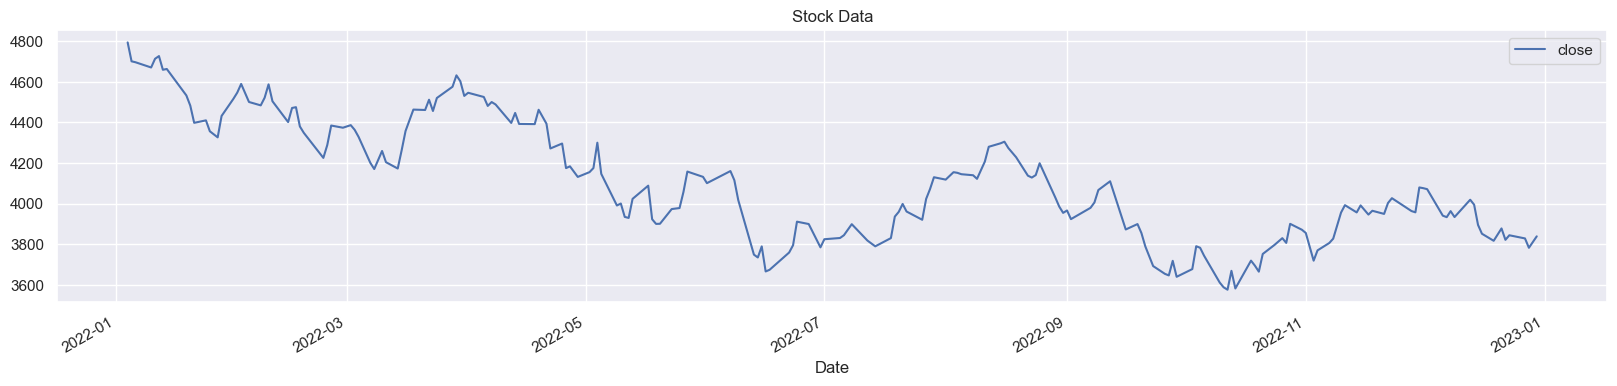

In [9]:
df1['close'].tail(200).plot(figsize=(20, 4))
plt.legend(loc='best')
plt.title('Stock Data')
plt.show(block=False)

In [10]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('Weak evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')


In [11]:
adfuller_test(df1['close'])

ADF Test Statistic: -0.7764132751399817
p-value: 0.8259525048206252
Weak evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.


In [12]:
df3=df1-df1.shift(1)

In [13]:
df3.head()

,open,high,low,close,close_cl,close_ovx,close_gc,close_gvz,close_dx,close_xyz,return
Date,,,,,,,,,,,
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,0.27,4.32,-2.84,3.76,-1.41,-0.340000,7.5,0.260000,0.824997,0.479995,0.0
2012-01-06,3.63,-1.21,8.08,-3.25,-0.25,-1.580002,-3.3,-1.040001,0.347000,0.850006,0.0
2012-01-09,-3.10,0.15,1.21,2.89,-0.25,-0.599999,-8.6,0.170000,-0.209000,0.299996,0.0
2012-01-11,14.19,11.81,10.86,11.78,-0.44,-1.000000,31.7,0.870001,0.225998,-0.189995,0.0


In [14]:
df3 = df3.dropna()

In [15]:
adfuller_test(df3['close'])

ADF Test Statistic: -9.98552860558483
p-value: 2.0603575493350894e-17
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


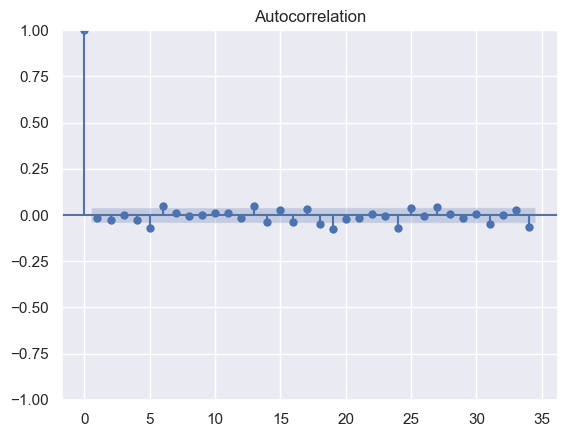

In [16]:
plot_acf(df3['close']);

C:\Users\Pankaj Suryavanssi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


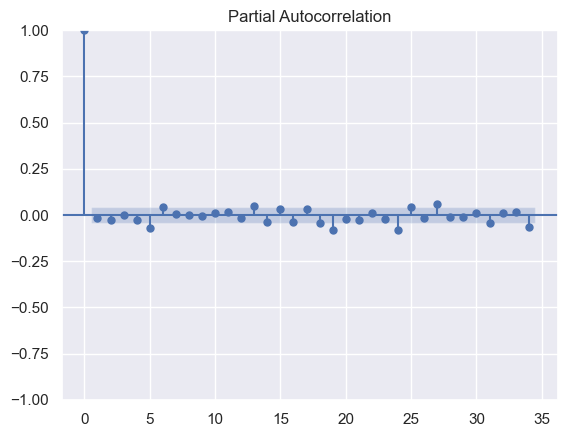

In [17]:
plot_pacf(df3['close']);

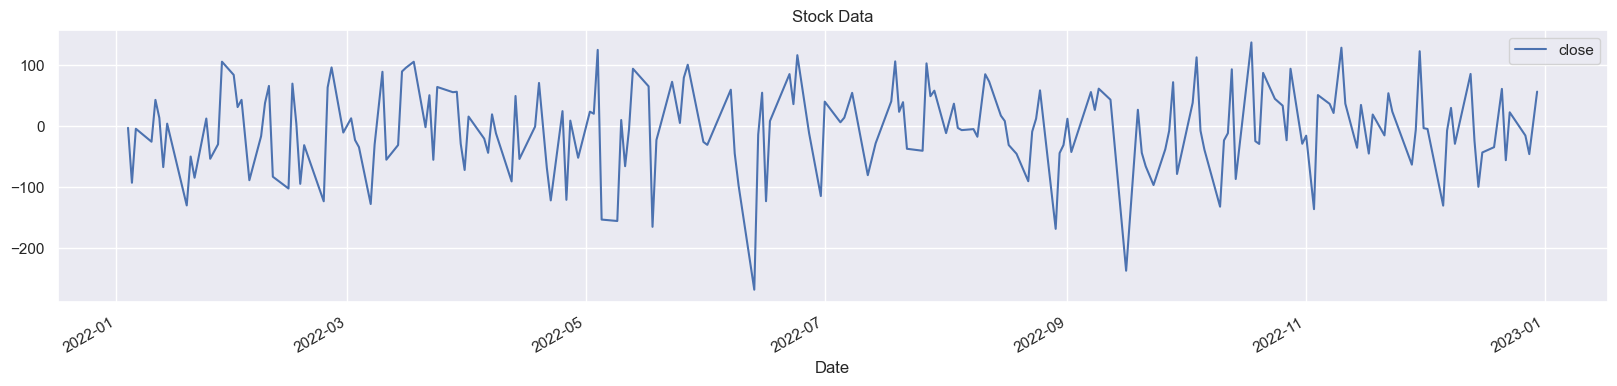

In [18]:
df3['close'].tail(200).plot(figsize=(20, 4))
plt.legend(loc='best')
plt.title('Stock Data')
plt.show(block=False)

ADF Test Statistic: -0.7764132751399817
p-value: 0.8259525048206252
Weak evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.
ADF Test Statistic: -9.98552860558483
p-value: 2.0603575493350894e-17
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


C:\Users\Pankaj Suryavanssi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


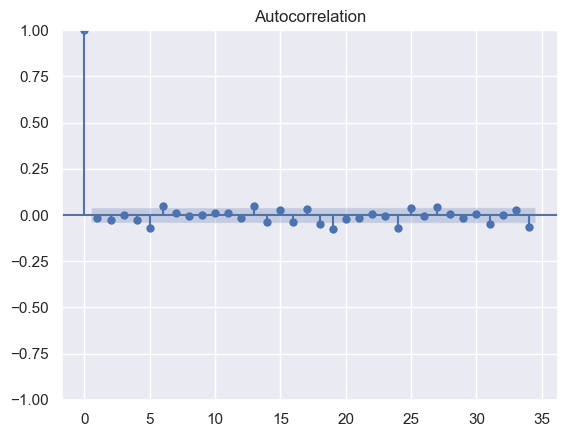

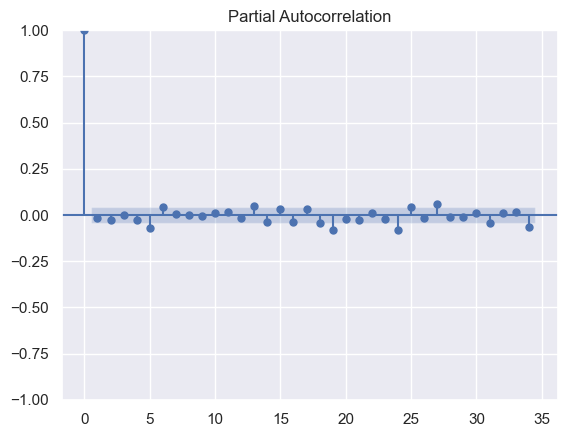

In [19]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('Weak evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')


adfuller_test(df1['close'])

df3=df1-df1.shift(1)

df3.head()

df3 = df3.dropna()

adfuller_test(df3['close'])

plot_acf(df3['close']);

plot_pacf(df3['close']);


In [20]:
def plot_auto_corr(data, title):
    plt.figure(figsize=(12,4))

    plt.subplot(121)
    plot_acf(data,lags=10, ax=plt.gca())
    plt.title('ACF for '+title)

    plt.subplot(122)
    plot_pacf(data,lags=10, ax=plt.gca())
    plt.title('PACF for'+title)

    plt.show()

13.42263735797442


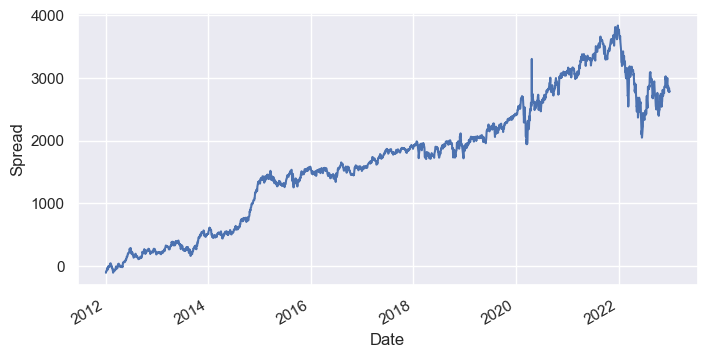

In [21]:
model = sm.OLS(df1['close'].iloc[:90], df1['close_cl'].iloc[:90])
model = model.fit() 
print(model.params[0])
#Spread
df1['spread'] = df1['close'] - model.params[0] *  df1['close_cl']
# Plot the spread
df1['spread'].plot(figsize=(8,4))
plt.ylabel("Spread")
plt.show()

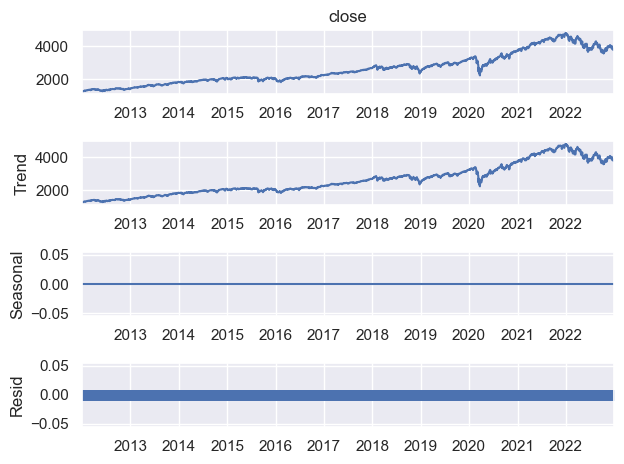

In [22]:
series = df1['close']
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

<Axes: >

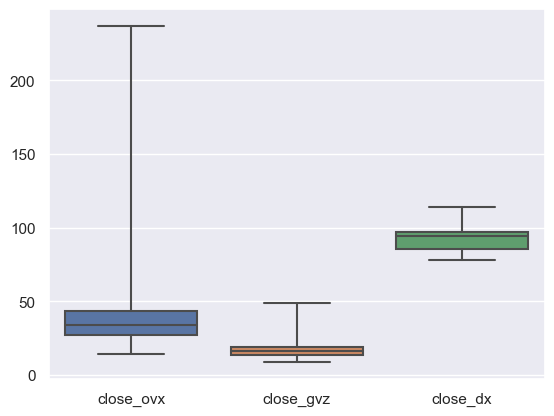

In [23]:
# Plot max, min values, & 2nd, 3rd quartile
sns.boxplot(df[['close_ovx','close_gvz','close_dx']], whis=np.inf)

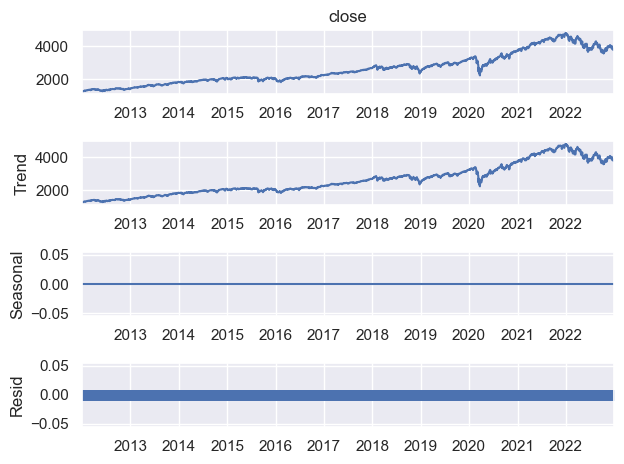

-1.4833940127999559

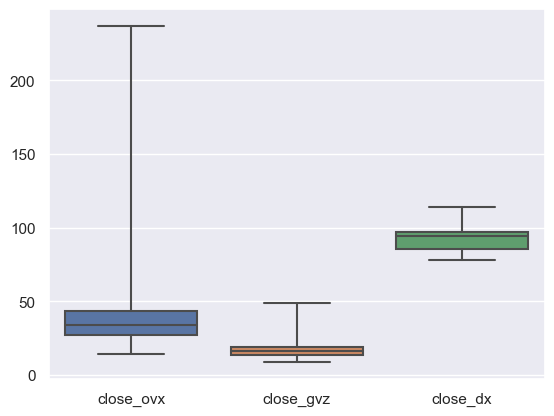

In [24]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = df1['close']
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

# Plot max, min values, & 2nd, 3rd quartile
sns.boxplot(df[['close_ovx','close_gvz','close_dx']], whis=np.inf)# Compute ADF test statistics
adf = adfuller(df1.spread, maxlag = 1)
adf[0]

In [25]:
adf[4]

{'1%': -3.433235285765301,
 '5%': -2.862814646891805,
 '10%': -2.5674485535435454}

In [26]:
import numpy as np
from numpy import zeros, ones, flipud, log
from numpy.linalg import inv, eig, cholesky as chol
from statsmodels.regression.linear_model import OLS


tdiff = np.diff

class Holder(object):
    pass

def rows(x):
    return x.shape[0]

def trimr(x, front, end):
    if end > 0:
        return x[front:-end]
    else:
        return x[front:]

import statsmodels.tsa.tsatools as tsat
mlag = tsat.lagmat

def mlag_(x, maxlag):
    '''return all lags up to maxlag
    '''
    return x[:-lag]

def lag(x, lag):
    return x[:-lag]

def detrend(y, order):
    if order == -1:
        return y
    return OLS(y, np.vander(np.linspace(-1, 1, len(y)), order + 1)).fit().resid

def resid(y, x):
    r = y - np.dot(x, np.dot(np.linalg.pinv(x), y))
    return r




def coint_johansen(x, p, k, print_on_console=True):

    #    % error checking on inputs
    #    if (nargin ~= 3)
    #     error('Wrong # of inputs to johansen')
    #    end
    nobs, m = x.shape

    # why this?  f is detrend transformed series, p is detrend data
    if (p > -1):
        f = 0
    else:
        f = p

    x = detrend(x, p)
    dx = tdiff(x, 1, axis=0)
    # dx    = trimr(dx,1,0)
    z = mlag(dx, k)  # [k-1:]
#    print z.shape
    z = trimr(z, k, 0)
    z = detrend(z, f)
#    print dx.shape
    dx = trimr(dx, k, 0)

    dx = detrend(dx, f)
    # r0t   = dx - z*(z\dx)
    r0t = resid(dx, z)  # diff on lagged diffs
    # lx = trimr(lag(x,k),k,0)
    lx = lag(x, k)
    lx = trimr(lx, 1, 0)
    dx = detrend(lx, f)
#    print 'rkt', dx.shape, z.shape
    # rkt   = dx - z*(z\dx)
    rkt = resid(dx, z)  # level on lagged diffs
    skk = np.dot(rkt.T, rkt) / rows(rkt)
    sk0 = np.dot(rkt.T, r0t) / rows(rkt)
    s00 = np.dot(r0t.T, r0t) / rows(r0t)
    sig = np.dot(sk0, np.dot(inv(s00), (sk0.T)))
    tmp = inv(skk)
    # du, au = eig(np.dot(tmp, sig))
    au, du = eig(np.dot(tmp, sig))  # au is eval, du is evec
    # orig = np.dot(tmp, sig)

    # % Normalize the eigen vectors such that (du'skk*du) = I
    temp = inv(chol(np.dot(du.T, np.dot(skk, du))))
    dt = np.dot(du, temp)


    # JP: the next part can be done much  easier

    # %      NOTE: At this point, the eigenvectors are aligned by column. To
    # %            physically move the column elements using the MATLAB sort,
    # %            take the transpose to put the eigenvectors across the row

    # dt = transpose(dt)

    # % sort eigenvalues and vectors

    # au, auind = np.sort(diag(au))
    auind = np.argsort(au)
    # a = flipud(au)
    aind = flipud(auind)
    a = au[aind]
    # d = dt[aind,:]
    d = dt[:, aind]

    # %NOTE: The eigenvectors have been sorted by row based on auind and moved to array "d".
    # %      Put the eigenvectors back in column format after the sort by taking the
    # %      transpose of "d". Since the eigenvectors have been physically moved, there is
    # %      no need for aind at all. To preserve existing programming, aind is reset back to
    # %      1, 2, 3, ....

    # d  =  transpose(d)
    # test = np.dot(transpose(d), np.dot(skk, d))

    # %EXPLANATION:  The MATLAB sort function sorts from low to high. The flip realigns
    # %auind to go from the largest to the smallest eigenvalue (now aind). The original procedure
    # %physically moved the rows of dt (to d) based on the alignment in aind and then used
    # %aind as a column index to address the eigenvectors from high to low. This is a double
    # %sort. If you wanted to extract the eigenvector corresponding to the largest eigenvalue by,
    # %using aind as a reference, you would get the correct eigenvector, but with sorted
    # %coefficients and, therefore, any follow-on calculation would seem to be in error.
    # %If alternative programming methods are used to evaluate the eigenvalues, e.g. Frame method
    # %followed by a root extraction on the characteristic equation, then the roots can be
    # %quickly sorted. One by one, the corresponding eigenvectors can be generated. The resultant
    # %array can be operated on using the Cholesky transformation, which enables a unit
    # %diagonalization of skk. But nowhere along the way are the coefficients within the
    # %eigenvector array ever changed. The final value of the "beta" array using either method
    # %should be the same.


    # % Compute the trace and max eigenvalue statistics */
    lr1 = zeros(m)
    lr2 = zeros(m)
    cvm = zeros((m, 3))
    cvt = zeros((m, 3))
    iota = ones(m)
    t, junk = rkt.shape
    for i in range(0, m):
        tmp = trimr(log(iota - a), i , 0)
        lr1[i] = -t * np.sum(tmp, 0)  # columnsum ?
        # tmp = np.log(1-a)
        # lr1[i] = -t * np.sum(tmp[i:])
        lr2[i] = -t * log(1 - a[i])
        cvm[i, :] = c_sja(m - i, p)
        cvt[i, :] = c_sjt(m - i, p)
        aind[i] = i
    # end

    result = Holder()
    # % set up results structure
    # estimation results, residuals
    result.rkt = rkt
    result.r0t = r0t
    result.eig = a
    result.evec = d  # transposed compared to matlab ?
    result.lr1 = lr1
    result.lr2 = lr2
    result.cvt = cvt
    result.cvm = cvm
    result.ind = aind
    result.meth = 'johansen'

    if print_on_console == True:
        print ('--------------------------------------------------')
        print ('--> Trace Statistics')
        print ('variable statistic Crit-90% Crit-95%  Crit-99%')
        for i in range(len(result.lr1)):
            print ('r =', i, '\t', round(result.lr1[i], 4), result.cvt[i, 0], result.cvt[i, 1], result.cvt[i, 2])
        print ('--------------------------------------------------')
        print ('--> Eigen Statistics')
        print ('variable statistic Crit-90% Crit-95%  Crit-99%')
        for i in range(len(result.lr2)):
            print ('r =', i, '\t', round(result.lr2[i], 4), result.cvm[i, 0], result.cvm[i, 1], result.cvm[i, 2])
        print ('--------------------------------------------------')
        print ('eigenvectors:\n', result.evec)
        print ('--------------------------------------------------')
        print ('eigenvalues:\n', result.eig)
        print ('--------------------------------------------------')


    return result

def c_sjt(n, p):

# PURPOSE: find critical values for Johansen trace statistic
# ------------------------------------------------------------
# USAGE:  jc = c_sjt(n,p)
# where:    n = dimension of the VAR system
#               NOTE: routine doesn't work for n > 12
#           p = order of time polynomial in the null-hypothesis
#                 p = -1, no deterministic part
#                 p =  0, for constant term
#                 p =  1, for constant plus time-trend
#                 p >  1  returns no critical values
# ------------------------------------------------------------

    jcp0 = ((2.9762, 4.1296, 6.9406),
            (10.4741, 12.3212, 16.3640),
            (21.7781, 24.2761, 29.5147),
            (37.0339, 40.1749, 46.5716),
            (56.2839, 60.0627, 67.6367),
            (79.5329, 83.9383, 92.7136),
            (106.7351, 111.7797, 121.7375),
            (137.9954, 143.6691, 154.7977),
            (173.2292, 179.5199, 191.8122),
            (212.4721, 219.4051, 232.8291),
            (255.6732, 263.2603, 277.9962),
            (302.9054, 311.1288, 326.9716))


    jcp1 = ((2.7055, 3.8415, 6.6349),
            (13.4294, 15.4943, 19.9349),
            (27.0669, 29.7961, 35.4628),
            (44.4929, 47.8545, 54.6815),
            (65.8202, 69.8189, 77.8202),
            (91.1090, 95.7542, 104.9637),
            (120.3673, 125.6185, 135.9825),
            (153.6341, 159.5290, 171.0905),
            (190.8714, 197.3772, 210.0366),
            (232.1030, 239.2468, 253.2526),
            (277.3740, 285.1402, 300.2821),
            (326.5354, 334.9795, 351.2150))

    jcp2 = ((2.7055, 3.8415, 6.6349),
            (16.1619, 18.3985, 23.1485),
            (32.0645, 35.0116, 41.0815),
            (51.6492, 55.2459, 62.5202),
            (75.1027, 79.3422, 87.7748),
            (102.4674, 107.3429, 116.9829),
            (133.7852, 139.2780, 150.0778),
            (169.0618, 175.1584, 187.1891),
            (208.3582, 215.1268, 228.2226),
            (251.6293, 259.0267, 273.3838),
            (298.8836, 306.8988, 322.4264),
            (350.1125, 358.7190, 375.3203))



    if (p > 1) or (p < -1):
        jc = (0, 0, 0)
    elif (n > 12) or (n < 1):
        jc = (0, 0, 0)
    elif p == -1:
        jc = jcp0[n - 1]
    elif p == 0:
        jc = jcp1[n - 1]
    elif p == 1:
        jc = jcp2[n - 1]



    return jc

def c_sja(n, p):

# PURPOSE: find critical values for Johansen maximum eigenvalue statistic
# ------------------------------------------------------------
# USAGE:  jc = c_sja(n,p)
# where:    n = dimension of the VAR system
#           p = order of time polynomial in the null-hypothesis
#                 p = -1, no deterministic part
#                 p =  0, for constant term
#                 p =  1, for constant plus time-trend
#                 p >  1  returns no critical values
# ------------------------------------------------------------
# RETURNS: a (3x1) vector of percentiles for the maximum eigenvalue
#          statistic for: [90# 95# 99#]
# ------------------------------------------------------------
# NOTES: for n > 12, the function returns a (3x1) vector of zeros.
#        The values returned by the function were generated using
#        a method described in MacKinnon (1996), using his FORTRAN
#        program johdist.f
# ------------------------------------------------------------


    jcp0 = ((2.9762, 4.1296, 6.9406),
            (9.4748, 11.2246, 15.0923),
            (15.7175, 17.7961, 22.2519),
            (21.8370, 24.1592, 29.0609),
            (27.9160, 30.4428, 35.7359),
            (33.9271, 36.6301, 42.2333),
            (39.9085, 42.7679, 48.6606),
            (45.8930, 48.8795, 55.0335),
            (51.8528, 54.9629, 61.3449),
            (57.7954, 61.0404, 67.6415),
            (63.7248, 67.0756, 73.8856),
            (69.6513, 73.0946, 80.0937))

    jcp1 = ((2.7055, 3.8415, 6.6349),
            (12.2971, 14.2639, 18.5200),
            (18.8928, 21.1314, 25.8650),
            (25.1236, 27.5858, 32.7172),
            (31.2379, 33.8777, 39.3693),
            (37.2786, 40.0763, 45.8662),
            (43.2947, 46.2299, 52.3069),
            (49.2855, 52.3622, 58.6634),
            (55.2412, 58.4332, 64.9960),
            (61.2041, 64.5040, 71.2525),
            (67.1307, 70.5392, 77.4877),
            (73.0563, 76.5734, 83.7105))

    jcp2 = ((2.7055, 3.8415, 6.6349),
            (15.0006, 17.1481, 21.7465),
            (21.8731, 24.2522, 29.2631),
            (28.2398, 30.8151, 36.1930),
            (34.4202, 37.1646, 42.8612),
            (40.5244, 43.4183, 49.4095),
            (46.5583, 49.5875, 55.8171),
            (52.5858, 55.7302, 62.1741),
            (58.5316, 61.8051, 68.5030),
            (64.5292, 67.9040, 74.7434),
            (70.4630, 73.9355, 81.0678),
            (76.4081, 79.9878, 87.2395))


    if (p > 1) or (p < -1):
        jc = (0, 0, 0)
    elif (n > 12) or (n < 1):
        jc = (0, 0, 0)
    elif p == -1:
        jc = jcp0[n - 1]
    elif p == 0:
        jc = jcp1[n - 1]
    elif p == 1:
        jc = jcp2[n - 1]


    return jc

In [27]:
SP_Close = df1['close']
Crude_cl = df1['close_cl']

df= pd.DataFrame({'x':SP_Close, 'y':Crude_cl})
print(coint_johansen(df,0,1))

--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 8.7422 13.4294 15.4943 19.9349
r = 1 	 2.4222 2.7055 3.8415 6.6349
--------------------------------------------------
--> Eigen Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 6.32 12.2971 14.2639 18.52
r = 1 	 2.4222 2.7055 3.8415 6.6349
--------------------------------------------------
eigenvectors:
 [[ 0.00017728 -0.00108345]
 [-0.04178381 -0.01267341]]
--------------------------------------------------
eigenvalues:
 [0.00278149 0.00106694]
--------------------------------------------------


In [28]:
len(df['2022'])

C:\Users\Pankaj Suryavanssi\AppData\Local\Temp\ipykernel_36500\3447913510.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  len(df['2022'])


201

In [29]:
n_obs=244
X_train, X_test = df1[0:-n_obs], df1[-n_obs:]
print(X_train.shape, X_test.shape)

(2027, 12) (244, 12)


In [30]:
X_train_transformed = X_train.diff().dropna()
X_train_transformed.head()

,open,high,low,close,close_cl,close_ovx,close_gc,close_gvz,close_dx,close_xyz,return,spread
Date,,,,,,,,,,,,
2012-01-05,0.27,4.32,-2.84,3.76,-1.41,-0.340000,7.5,0.260000,0.824997,0.479995,0.0,22.685919
2012-01-06,3.63,-1.21,8.08,-3.25,-0.25,-1.580002,-3.3,-1.040001,0.347000,0.850006,0.0,0.105659
2012-01-09,-3.10,0.15,1.21,2.89,-0.25,-0.599999,-8.6,0.170000,-0.209000,0.299996,0.0,6.245659
2012-01-11,14.19,11.81,10.86,11.78,-0.44,-1.000000,31.7,0.870001,0.225998,-0.189995,0.0,17.685960
2012-01-12,0.46,3.02,0.36,3.02,-1.77,1.070000,8.1,-0.740000,-0.577995,-0.250000,0.0,26.778068


In [31]:
X_train_transformed.describe()

,open,high,low,close,close_cl,close_ovx,close_gc,close_gvz,close_dx,close_xyz,return,spread
count,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.0,2026.000000
mean,1.572897,1.584413,1.569284,1.583988,-0.011244,-0.001984,0.089733,-0.003233,0.006861,0.009487,0.0,1.734910
std,25.592141,22.899620,26.548347,28.599372,2.125610,4.713803,16.200285,1.131205,0.434144,0.380386,0.0,38.599801
min,-194.740000,-184.880000,-228.360000,-324.890000,-55.900000,-93.790001,-140.400000,-9.500000,-2.459999,-2.369995,0.0,-600.514444
25%,-6.875000,-6.185000,-8.267500,-7.880000,-0.767500,-0.997500,-7.200000,-0.510000,-0.238005,-0.207500,0.0,-12.983668
50%,2.025000,1.630000,2.365000,1.690000,0.020000,-0.090000,0.300000,-0.080000,0.005997,0.010002,0.0,1.151231
75%,12.200000,10.457500,12.035000,12.280000,0.780000,0.830002,7.875000,0.440000,0.245001,0.220001,0.0,17.766101
max,160.370000,187.300000,156.280000,230.380000,47.640000,130.220001,93.200000,13.160000,3.801002,1.919998,0.0,748.815428


In [32]:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
print('Augmented Dickey-Fuller Test: Crude oil Time Series')
augmented_dickey_fuller_statistics(X_train_transformed['close_cl'])
print('Augmented Dickey-Fuller Test: SPX Price Time Series')
augmented_dickey_fuller_statistics(X_train_transformed['close'])

Augmented Dickey-Fuller Test: Crude oil Time Series
ADF Statistic: -18.301357
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Augmented Dickey-Fuller Test: SPX Price Time Series
ADF Statistic: -9.826140
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


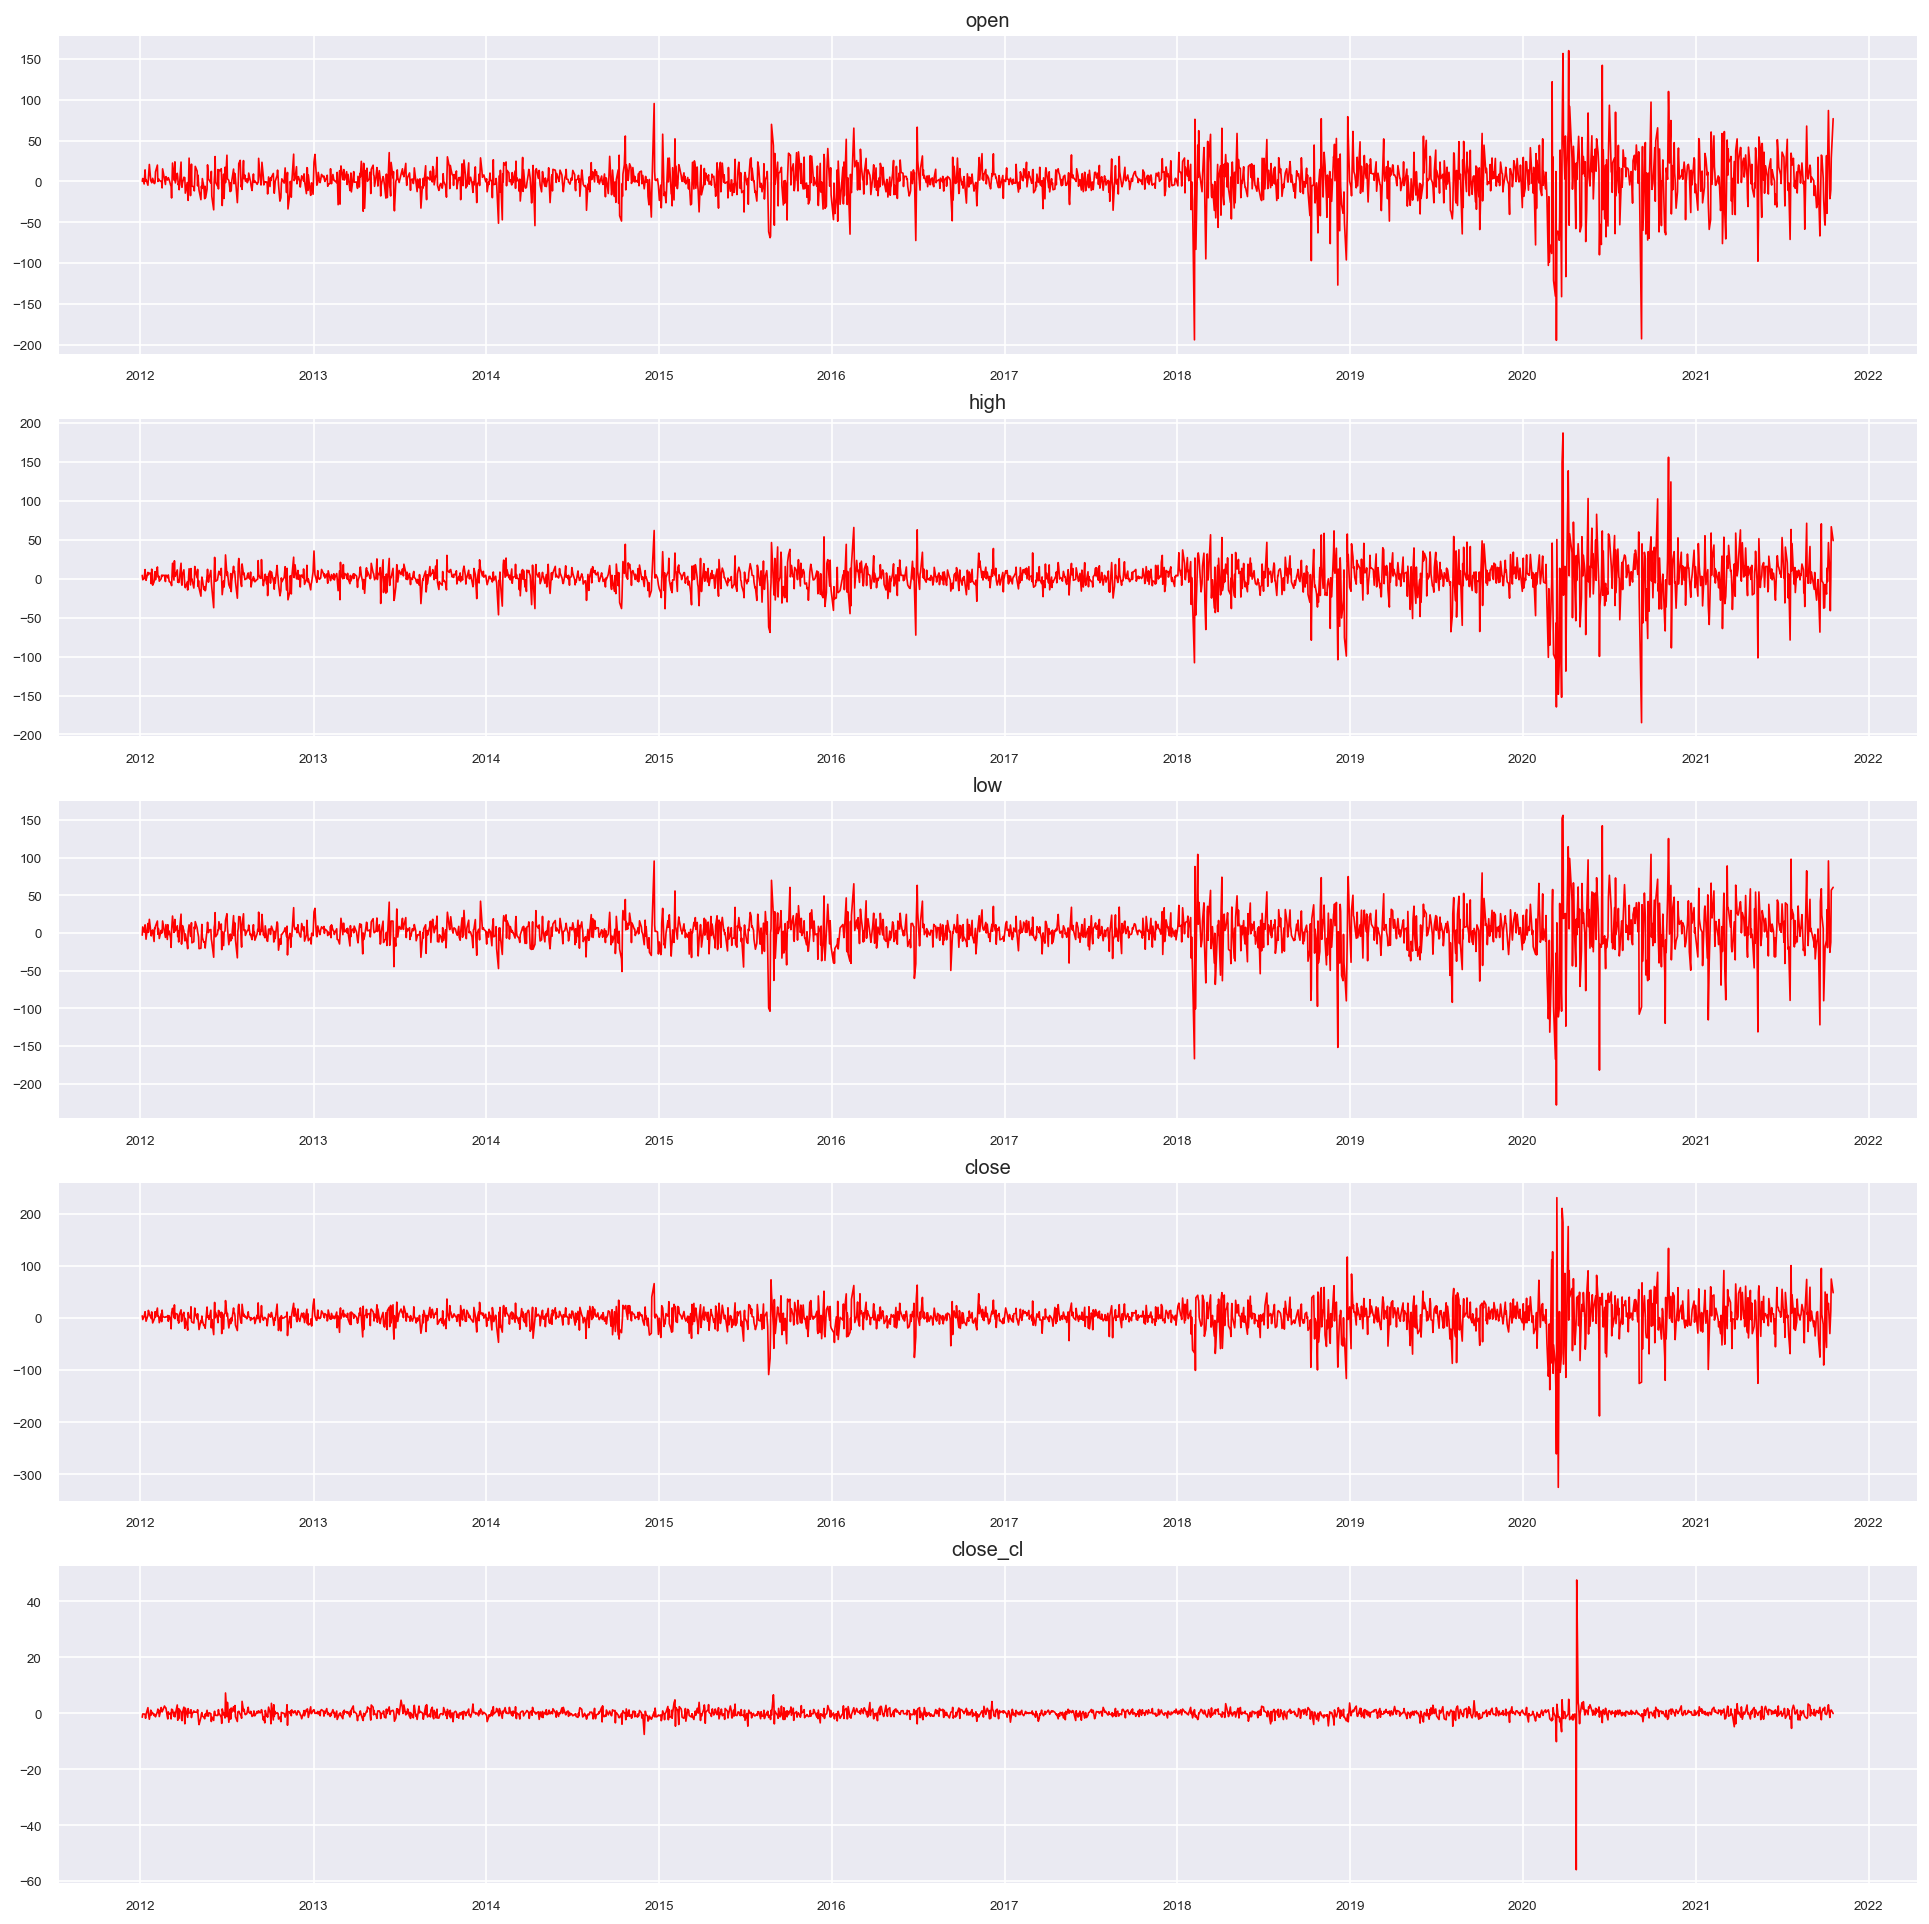

In [33]:
# lets look at each of them displayed out to see that they are stationary
fig, axes = plt.subplots(nrows=5, ncols=1, dpi=120, figsize=(20,20))
for i, ax in enumerate(axes.flatten()):
    d = X_train_transformed[X_train_transformed.columns[i]]
    ax.plot(d, color='red', linewidth=1)
    ax.set_title(X_train_transformed.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=8)
plt.show();

In [83]:
# We will need to calculate the Root of the Mean Squarred Error in order to determine the best set of parameters. 
# Function for calculating the RMSE:

def RMSEfromResid(X):
    summ = 0
    for i in X:
        summ+=i**2
    return((summ/len(X))**0.5)

In [38]:
#ARIMA Models selection
from sklearn.metrics import mean_squared_error
date = df1.index
X = df1['close']
size = int(len(X)*0.8)
train, test = X[0:size], X[size:len(X)]
date_test = date[size:]
def evaluate_arima_model(X, model_order):
    model_arima = ARIMA(X, order=model_order).fit()
    AIC = model_arima.aic
    BIC = model_arima.bic
    LLF = model_arima.llf
    RMSE = RMSEfromResid(model_arima.resid)
    return([AIC, BIC, LLF, RMSE])


In [99]:
import warnings
warnings.filterwarnings("ignore")
# evaluate combinations of p, d and q values for an ARIMA model
p_values = [0,1,2,3]
d_values = [1]
q_values = [0,1,2]
data = list()
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                [AIC, BIC, LLF, RMSE] = evaluate_arima_model(train, order)
                data.append([order,AIC, BIC, LLF, RMSE])
            except:
                continue

ARIMA_Models = pd.DataFrame(data,columns=['ARIMA', 'AIC', 'BIC', 'Maximum Log-Likelihood', 'RMSE'],dtype=float)
evaluate_arima_model(X, order)
ARIMA_Models.sort_values(by=['RMSE'])


,ARIMA,AIC,BIC,Maximum Log-Likelihood,RMSE
10,"(3, 1, 1)",17184.665952,17212.185156,-8587.332976,27.401499
11,"(3, 1, 2)",17188.596606,17221.619650,-8588.298303,27.415259
8,"(2, 1, 2)",17187.742095,17215.261299,-8588.871048,27.423555
7,"(2, 1, 1)",17186.463820,17208.479183,-8589.231910,27.429501
4,"(1, 1, 1)",17185.171611,17201.683133,-8589.585805,27.434567
5,"(1, 1, 2)",17187.244810,17209.260173,-8589.622405,27.435761
2,"(0, 1, 2)",17185.773814,17202.285337,-8589.886907,27.439142
1,"(0, 1, 1)",17195.065719,17206.073401,-8595.532860,27.525801
9,"(3, 1, 0)",17560.295382,17582.310745,-8776.147691,30.444658
6,"(2, 1, 0)",17667.050720,17683.562242,-8830.525360,31.372055


In [ ]:
#ARIMA Prediction
history = [x for x in train]
predictions = list()
data=list()
#len_test = len(test)
len_test= len(test)
for t in range(len_test):
#    model_arima = ARIMA(endog = history, order=(2, 1, 1)).fit()
    model_arima = ARIMA(endog = history, order=(3, 1, 2)).fit()
    output = model_arima.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    data.append([date_test[t], obs, yhat])
    
RMSE = (mean_squared_error(test, predictions))**0.5
arima_results = pd.DataFrame(data,columns=['Period','Actual Price', 'Predicted Price'],dtype=float)
print('Test RMSE: %.3f' % RMSE)

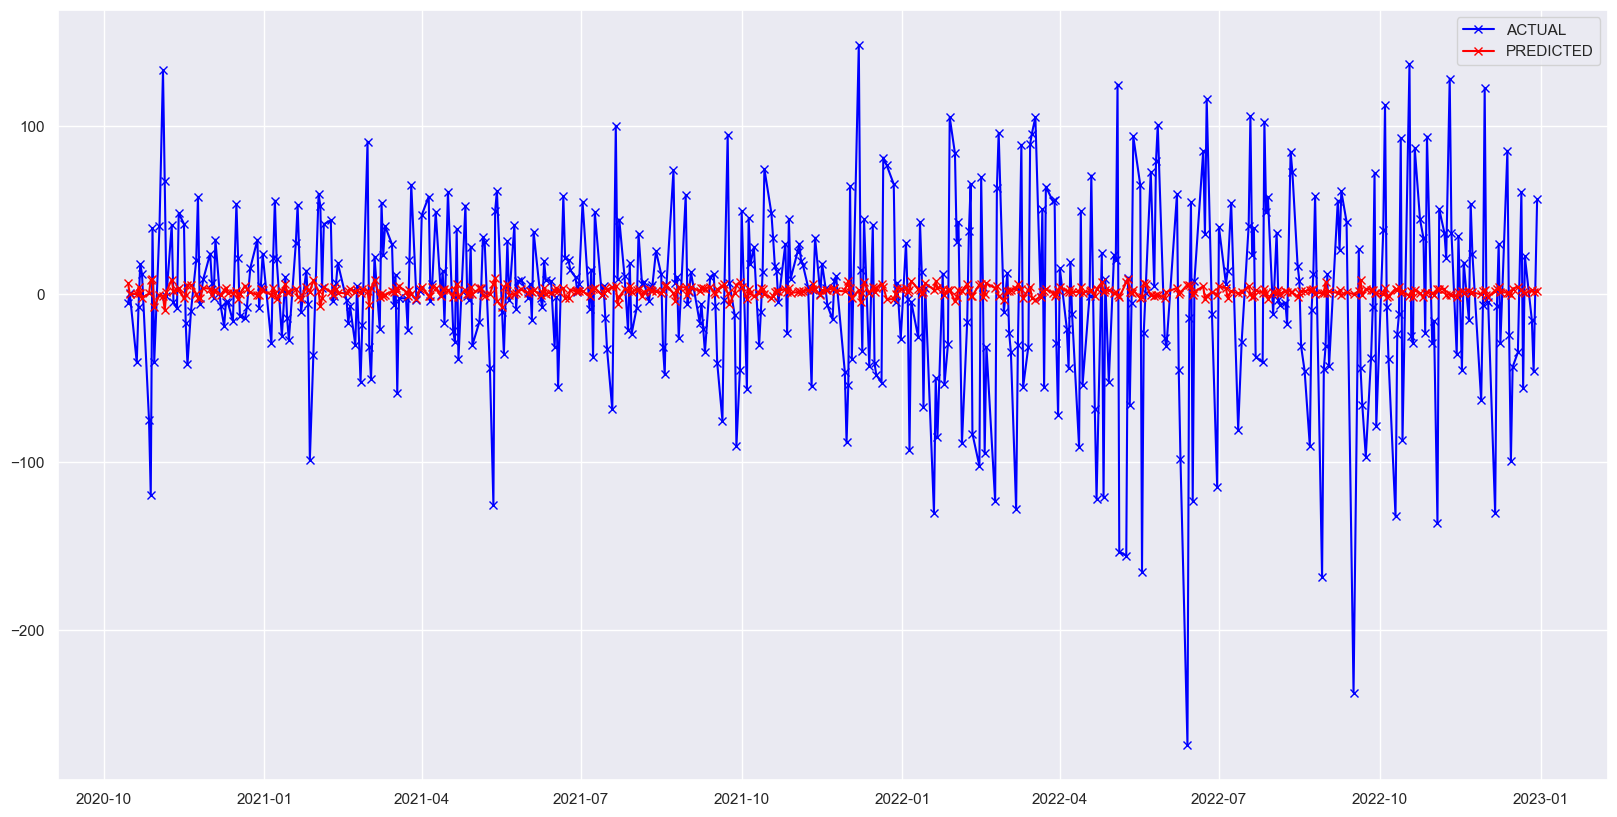

In [101]:
# plot
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(date_test, test, color='Blue', label='ACTUAL', marker='x')
plt.plot(date_test, predictions, color='red', label='PREDICTED', marker='x')
plt.legend(loc='upper right')
plt.show()
arimax_pred = predictions
arimax_RMSE = RMSE

In [102]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

print('The Mean Absolute Percentage Error is: %.3f' % mape(np.array(test), predictions),'%.')

The Mean Absolute Percentage Error is: 106.248 %.


In [40]:
# Train-Test-Split:
#exoneous :Crude oil
#df1['diffCL'] = df1['close_cl'].diff()
#df1['diffSPX'] = df1['close'].diff()
#date = df1.index
#df1['SPX_lag']=df1['diffSPX'].shift()
#df1.dropna(inplace=True)
#CL_end = df1['close_cl']
#SPX_ex = df1['SPX_lag']
#m = len(CL_end)
#size = int(len(CL_end)*0.8)
#train, test = CL_end[0:size], CL_end[size:m]
#ex_train, ex_test = SPX_ex[0:size], SPX_ex[size:m]
#date_test = date[size:]

df1['diffCL'] = df1['close_cl'].diff()
df1['diffSPX'] = df1['close'].diff()
date = df1.index
df1['CL_lag']=df1['diffCL'].shift()
df1.dropna(inplace=True)
SP_end = df1['close']
CL_ex = df1['CL_lag']
m = len(SP_end)
size = int(len(SP_end)*0.8)
train, test = SP_end[0:size], SP_end[size:m]
ex_train, ex_test = CL_ex[0:size], CL_ex[size:m]
date_test = date[size:]

def evaluate_arimax_model(y, X, model_order):
    model_arimax = ARIMA(endog = y, exog=X, order=model_order).fit()
    AIC = model_arimax.aic
    BIC = model_arimax.bic
    LLF = model_arimax.llf
    RMSE = RMSEfromResid(model_arimax.resid)
    return([AIC, BIC, LLF, RMSE])

warnings.filterwarnings("ignore")
p_values = [0,1,2,3]
d_values = [1]
q_values = [0,1,2]
data = list()
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                [AIC, BIC, LLF, RMSE] = evaluate_arimax_model(train, ex_train, order)
                data.append([order,AIC, BIC, LLF, RMSE])
            except:
                continue

ARIMAX_Models = pd.DataFrame(data,columns=['ARIMAX', 'AIC', 'BIC', 'Maximum Log-Likelihood', 'RMSE'],dtype=float)

evaluate_arimax_model(train, ex_train, order)
ARIMAX_Models.sort_values(by=['RMSE'])


,ARIMAX,AIC,BIC,Maximum Log-Likelihood,RMSE
11,"(3, 1, 2)",17117.194899,17155.710204,-8551.597449,40.703443
8,"(2, 1, 2)",17115.491909,17148.505028,-8551.745954,40.704709
10,"(3, 1, 1)",17157.139305,17190.152424,-8572.569653,40.914975
9,"(3, 1, 0)",17155.150623,17182.661556,-8572.575312,40.915026
5,"(1, 1, 2)",17157.238450,17184.749382,-8573.619225,40.925560
7,"(2, 1, 1)",17158.063038,17185.573971,-8574.031519,40.929741
2,"(0, 1, 2)",17156.390060,17178.398806,-8574.195030,40.931385
6,"(2, 1, 0)",17157.219075,17179.227821,-8574.609537,40.935590
4,"(1, 1, 1)",17157.663231,17179.671977,-8574.831615,40.937862
3,"(1, 1, 0)",17156.056598,17172.563158,-8575.028299,40.939879


In [39]:
# For predicting from grid search cv
history = [x for x in train]
his_u = ex_train
predictions = list()
data=list()
test_index = list()
for t in range(len(ex_test)):
    model_arimax = ARIMA(endog = history,exog=his_u, order=(3, 1, 2)).fit()
    output = model_arimax.forecast(steps=1, exog=ex_test.iloc[[t]])
    #print(output)
    yhat = output
    predictions.append(yhat)
    history.append(test[t])
    test_index.append(t)
    his_u = ex_train.append(ex_test.iloc[test_index])
    data.append([date_test[t], test[t], yhat])


RMSE = (mean_squared_error(test, predictions))**0.5
arima_results = pd.DataFrame(data,columns=['Period','Actual Price', 'Predicted Price'],dtype=float)
print('Test RMSE: %.3f' % RMSE)

Test RMSE: 55.270


In [40]:
# Let's visualize the accuracy of the predictions to the test data with MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

print('The Mean Absolute Percentage Error is: %.3f' % mape(np.array(test), predictions),'%.')

The Mean Absolute Percentage Error is: 9.642 %.


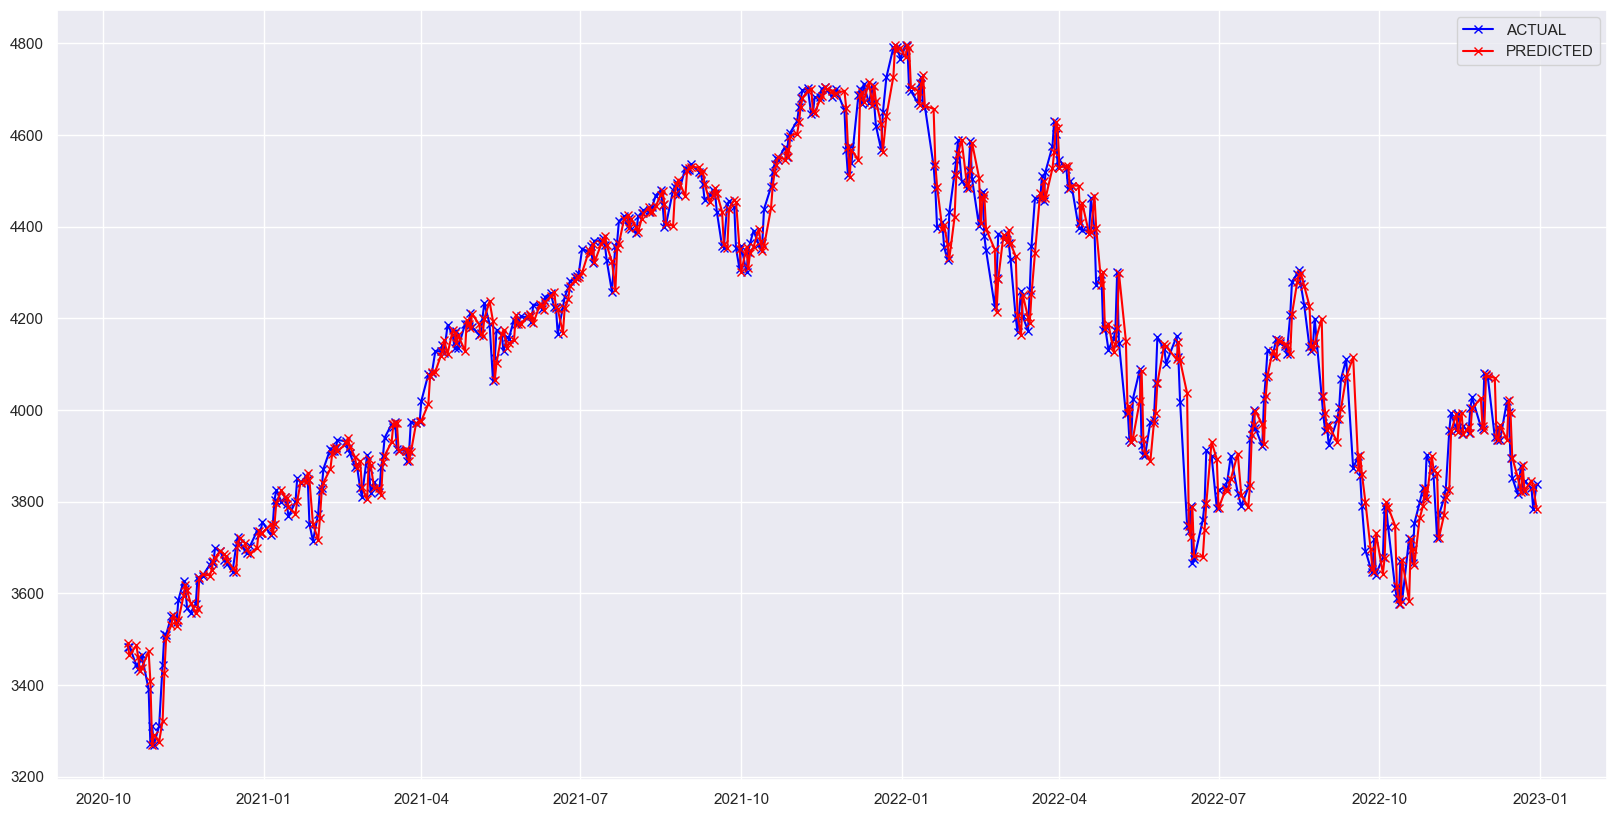

In [41]:
# plot our calculations above to compare prediction to actual trend
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(date_test[2:], test, color='Blue', label='ACTUAL', marker='x')
plt.plot(date_test[2:], predictions, color='red', label='PREDICTED', marker='x')
plt.legend(loc='upper right')
plt.show()
arimax_pred = predictions
arimax_RMSE = RMSE

In [42]:
# Train-Test-Split:
#exoneous :USD
#df1['diffdx'] = df1['close_dx'].diff()
#df1['diffSPX'] = df1['close'].diff()
#date = df1.index
#df1['SPX_lag']=df1['diffSPX'].shift()
#df1.dropna(inplace=True)
#DX_end = df1['close_dx']
#SPX_ex = df1['SPX_lag']
#m = len(DX_end)
#size = int(len(DX_end)*0.8)
#train, test = DX_end[0:size], DX_end[size:m]
#ex_train, ex_test = SPX_ex[0:size], SPX_ex[size:m]
#date_test = date[size:]

df1['diffDX'] = df1['close_dx'].diff()
df1['diffSPX'] = df1['close'].diff()
date = df1.index
df1['DX_lag']=df1['diffDX'].shift()
df1.dropna(inplace=True)
SP_end = df1['close']
DX_ex = df1['DX_lag']
m = len(SP_end)
size = int(len(SP_end)*0.8)
train, test = SP_end[0:size], SP_end[size:m]
ex_train, ex_test = DX_ex[0:size], DX_ex[size:m]
date_test = date[size:]

warnings.filterwarnings("ignore")
p_values = [0,1,2,3]
d_values = [1]
q_values = [0,1,2]
data = list()
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                [AIC, BIC, LLF, RMSE] = evaluate_arimax_model(train, ex_train, order)
                data.append([order,AIC, BIC, LLF, RMSE])
            except:
                continue

ARIMAX_Models = pd.DataFrame(data,columns=['ARIMAX', 'AIC', 'BIC', 'Maximum Log-Likelihood', 'RMSE'],dtype=float)

evaluate_arimax_model(train, ex_train, order)
ARIMAX_Models.sort_values(by=['RMSE'])


,ARIMAX,AIC,BIC,Maximum Log-Likelihood,RMSE
11,"(3, 1, 2)",17116.365558,17154.880863,-8551.182779,40.693220
8,"(2, 1, 2)",17114.630227,17147.643346,-8551.315114,40.694683
10,"(3, 1, 1)",17155.467885,17188.481003,-8571.733942,40.901261
9,"(3, 1, 0)",17153.472111,17180.983043,-8571.736056,40.901271
5,"(1, 1, 2)",17155.701752,17183.212685,-8572.850876,40.912840
7,"(2, 1, 1)",17156.520267,17184.031199,-8573.260133,40.916482
2,"(0, 1, 2)",17154.823627,17176.832373,-8573.411813,40.918495
6,"(2, 1, 0)",17155.607686,17177.616432,-8573.803843,40.922424
4,"(1, 1, 1)",17156.041975,17178.050721,-8574.020988,40.923962
3,"(1, 1, 0)",17154.363036,17170.869596,-8574.181518,40.926133


In [43]:
# For predicting from grid search cv
history = [x for x in train]
his_u = ex_train
predictions = list()
data=list()
test_index = list()
for t in range(len(ex_test)):
    model_arimax = ARIMA(endog = history,exog=his_u, order=(2, 1, 1)).fit()
    output = model_arimax.forecast(steps=1, exog=ex_test.iloc[[t]])
    #print(output)
    yhat = output
    predictions.append(yhat)
    history.append(test[t])
    test_index.append(t)
    his_u = ex_train.append(ex_test.iloc[test_index])
    data.append([date_test[t], test[t], yhat])


RMSE = (mean_squared_error(test, predictions))**0.5
arima_results = pd.DataFrame(data,columns=['Period','Actual Price', 'Predicted Price'],dtype=float)
print('Test RMSE: %.3f' % RMSE)

Test RMSE: 54.655


In [44]:
# Let's visualize the accuracy of the predictions to the test data with MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

print('The Mean Absolute Percentage Error is: %.3f' % mape(np.array(test), predictions),'%.')

The Mean Absolute Percentage Error is: 9.642 %.


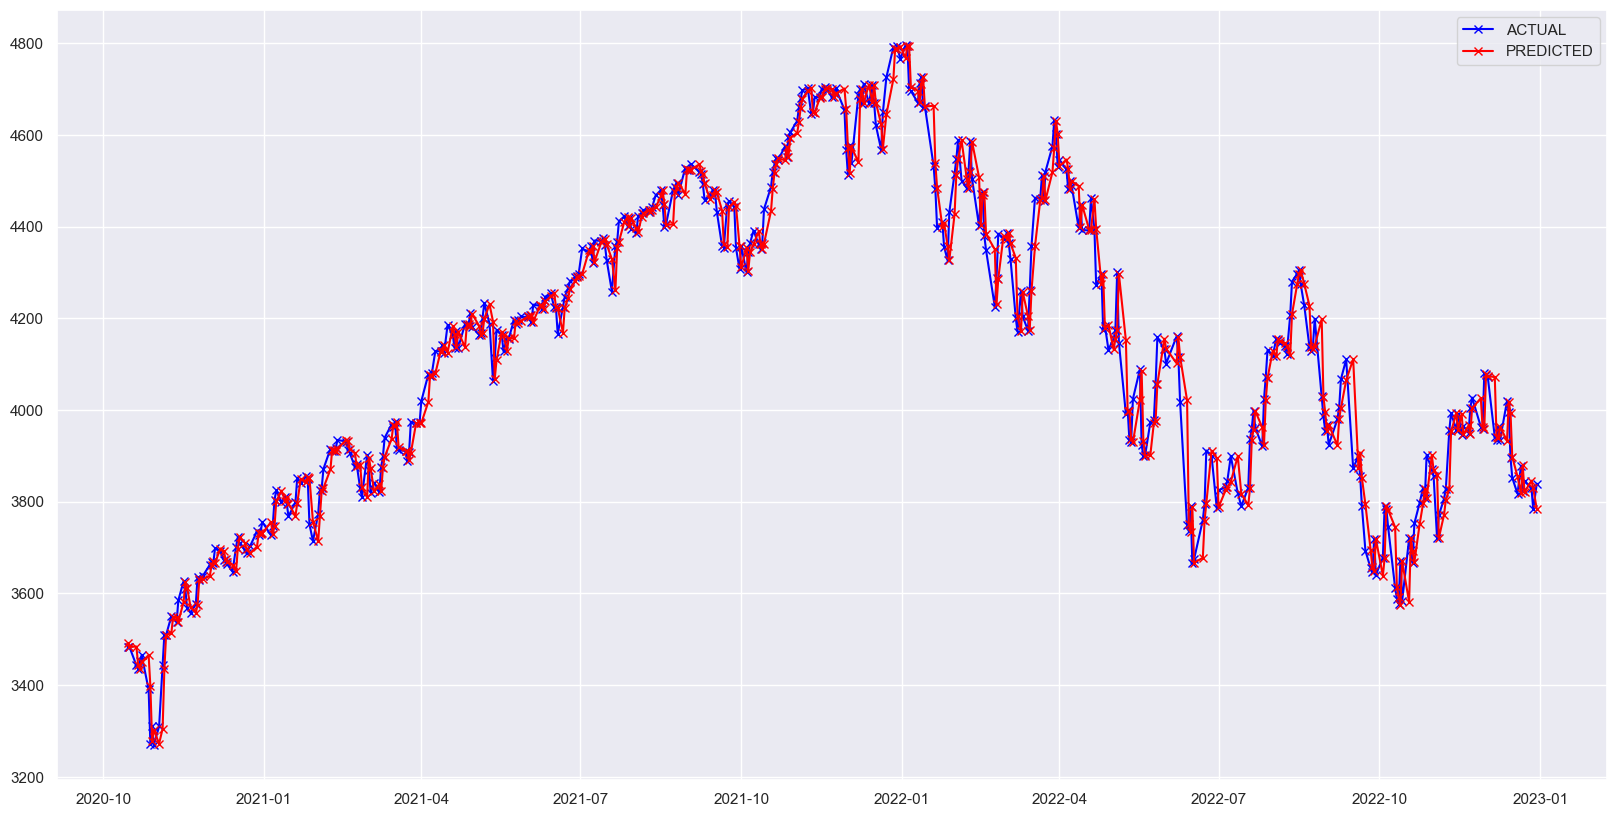

In [45]:
# plot our calculations above to compare prediction to actual trend
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(date_test[2:], test, color='Blue', label='ACTUAL', marker='x')
plt.plot(date_test[2:], predictions, color='red', label='PREDICTED', marker='x')
plt.legend(loc='upper right')
plt.show()
arimax_pred = predictions
arimax_RMSE = RMSE

In [46]:
# Train-Test-Split:
#exoneous :GOLD
#df1['diffGC'] = df1['close_gc'].diff()
#df1['diffSPX'] = df1['close'].diff()
#date = df1.index
#df1['SPX_lag']=df1['diffSPX'].shift()
#df1.dropna(inplace=True)
#GC_end = df1['close_gc']
#SPX_ex = df1['SPX_lag']
#m = len(GC_end)
#size = int(len(GC_end)*0.8)
#train, test = GC_end[0:size], GC_end[size:m]
#ex_train, ex_test = SPX_ex[0:size], SPX_ex[size:m]
#date_test = date[size:]

df1['diffGC'] = df1['close_gc'].diff()
df1['diffSPX'] = df1['close'].diff()
date = df1.index
df1['GC_lag']=df1['diffGC'].shift()
df1.dropna(inplace=True)
SP_end = df1['close']
GC_ex = df1['GC_lag']
m = len(SP_end)
size = int(len(SP_end)*0.8)
train, test = SP_end[0:size], SP_end[size:m]
ex_train, ex_test = GC_ex[0:size], GC_ex[size:m]
date_test = date[size:]


warnings.filterwarnings("ignore")
p_values = [0,1,2,3]
d_values = [1]
q_values = [0,1,2]
data = list()
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                [AIC, BIC, LLF, RMSE] = evaluate_arimax_model(train, ex_train, order)
                data.append([order,AIC, BIC, LLF, RMSE])
            except:
                continue

ARIMAX_Models = pd.DataFrame(data,columns=['ARIMAX', 'AIC', 'BIC', 'Maximum Log-Likelihood', 'RMSE'],dtype=float)

evaluate_arimax_model(train, ex_train, order)
ARIMAX_Models.sort_values(by=['RMSE'])


,ARIMAX,AIC,BIC,Maximum Log-Likelihood,RMSE
11,"(3, 1, 2)",17109.475776,17147.987218,-8547.737888,40.657724
8,"(2, 1, 2)",17107.720580,17140.730387,-8547.860290,40.659032
10,"(3, 1, 1)",17148.557208,17181.567015,-8568.278604,40.868583
9,"(3, 1, 0)",17146.566688,17174.074860,-8568.283344,40.868632
5,"(1, 1, 2)",17148.173587,17175.681759,-8569.086793,40.878097
7,"(2, 1, 1)",17149.014712,17176.522884,-8569.507356,40.882328
2,"(0, 1, 2)",17147.230237,17169.236775,-8569.615119,40.883681
6,"(2, 1, 0)",17148.111419,17170.117957,-8570.055710,40.888037
4,"(1, 1, 1)",17148.689168,17170.695706,-8570.344584,40.890629
3,"(1, 1, 0)",17147.234936,17163.739840,-8570.617468,40.892898


In [47]:
# For predicting from grid search cv
history = [x for x in train]
his_u = ex_train
predictions = list()
data=list()
test_index = list()
for t in range(len(ex_test)):
    model_arimax = ARIMA(endog = history,exog=his_u, order=(2, 1, 1)).fit()
    output = model_arimax.forecast(steps=1, exog=ex_test.iloc[[t]])
    #print(output)
    yhat = output
    predictions.append(yhat)
    history.append(test[t])
    test_index.append(t)
    his_u = ex_train.append(ex_test.iloc[test_index])
    data.append([date_test[t], test[t], yhat])


RMSE = (mean_squared_error(test, predictions))**0.5
arima_results = pd.DataFrame(data,columns=['Period','Actual Price', 'Predicted Price'],dtype=float)
print('Test RMSE: %.3f' % RMSE)

Test RMSE: 54.678


In [48]:
# Let's visualize the accuracy of the predictions to the test data with MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

print('The Mean Absolute Percentage Error is: %.3f' % mape(np.array(test), predictions),'%.')

The Mean Absolute Percentage Error is: 9.610 %.


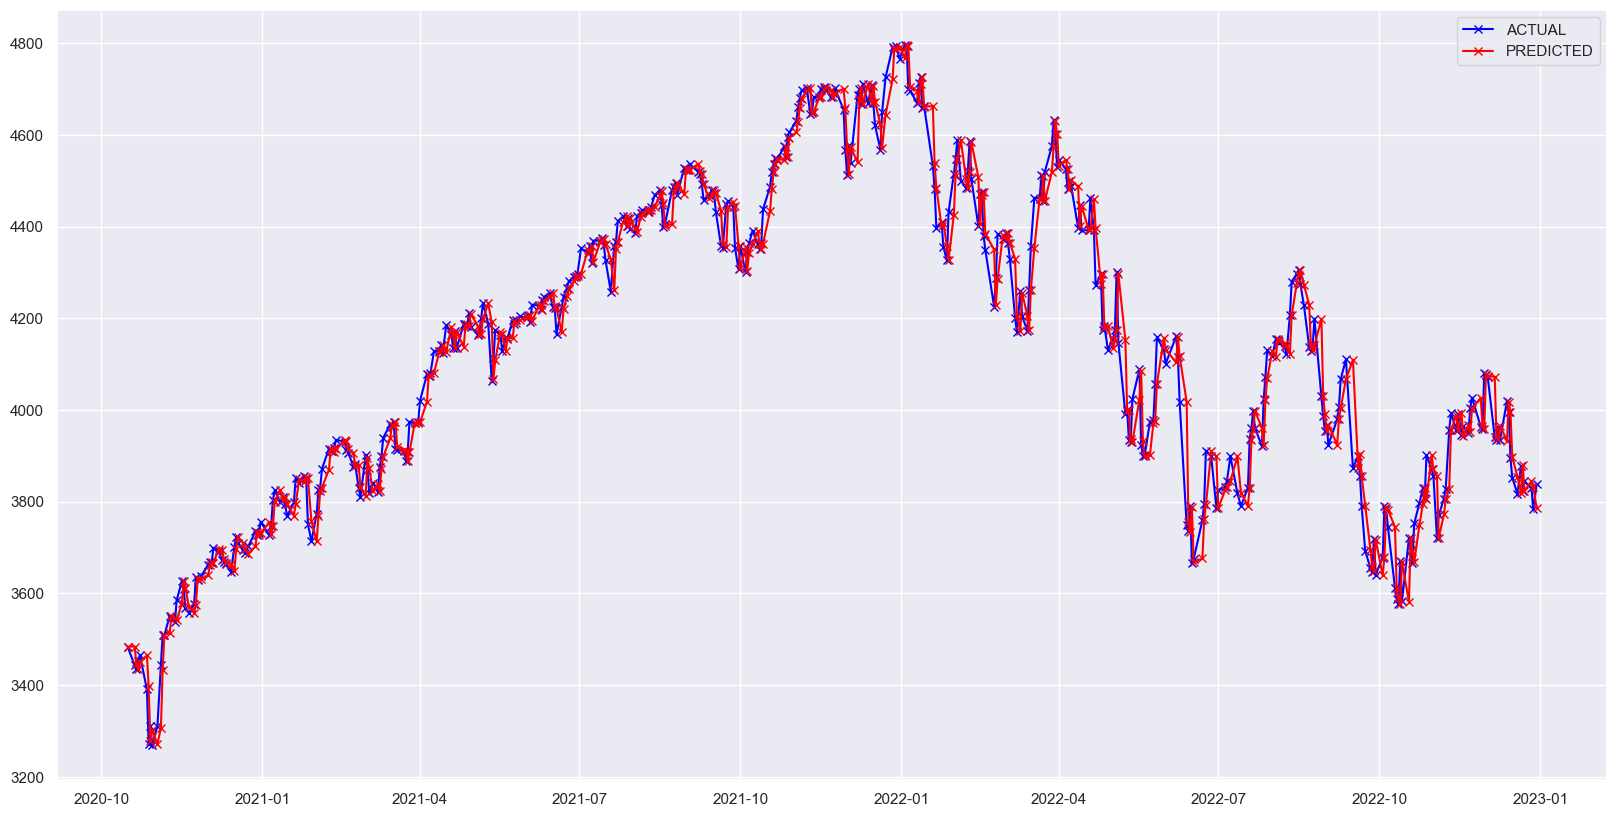

In [49]:
# plot our calculations above to compare prediction to actual trend
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(date_test[2:], test, color='Blue', label='ACTUAL', marker='x')
plt.plot(date_test[2:], predictions, color='red', label='PREDICTED', marker='x')
plt.legend(loc='upper right')
plt.show()
arimax_pred = predictions
arimax_RMSE = RMSE

Test RMSE: 2.607
The Mean Absolute Percentage Error is: 31.866 %.


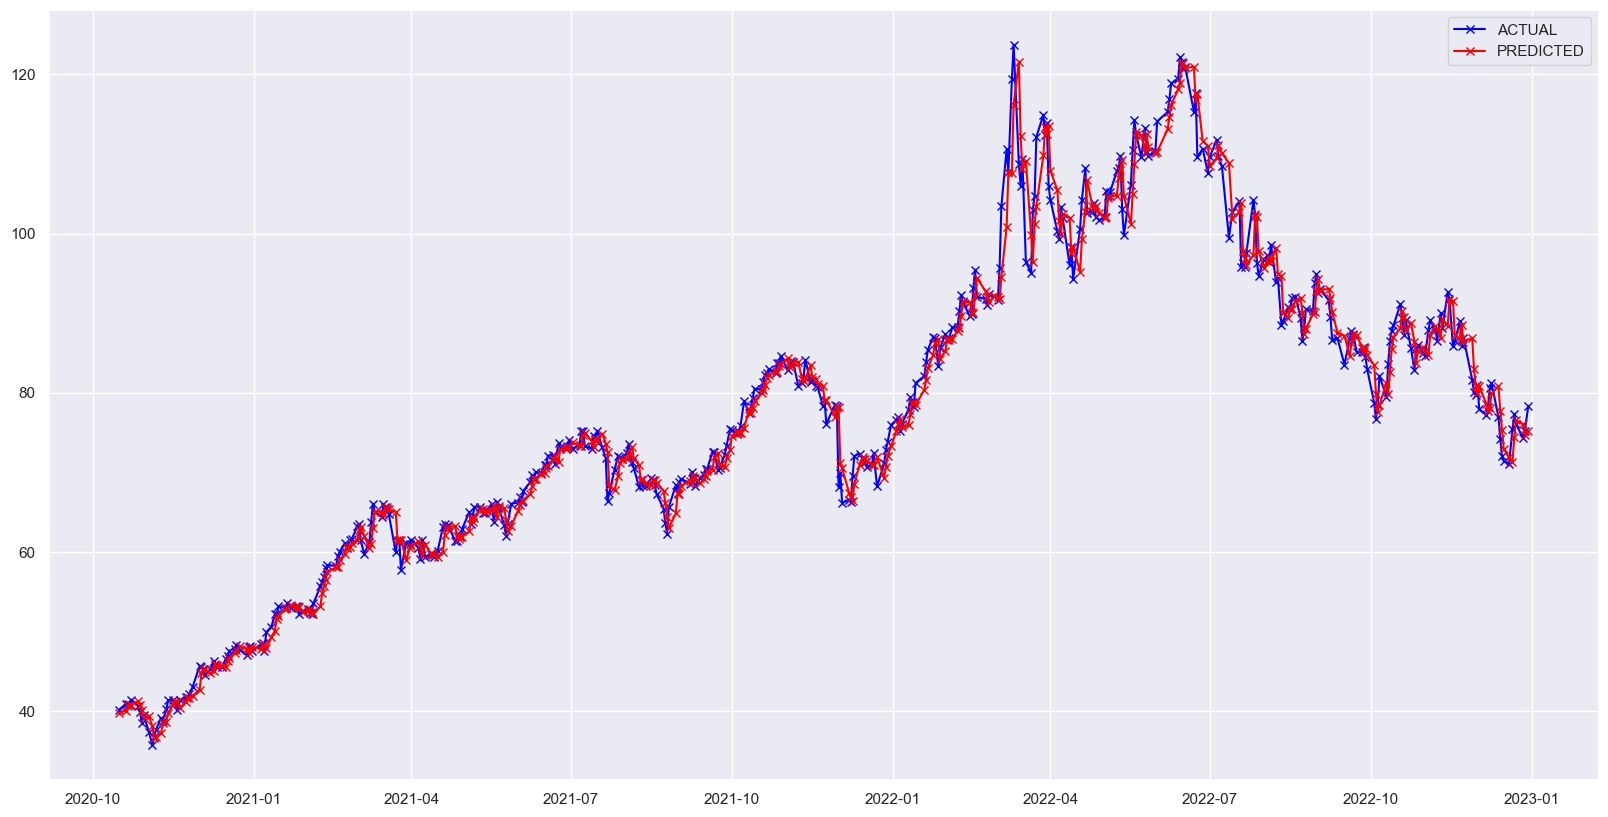

In [50]:
# Train-Test-Split:
#exoneous :Crude oil
df1['diffCL'] = df1['close_cl'].diff()
df1['diffSPX'] = df1['close'].diff()
date = df1.index
df1['SPX_lag']=df1['diffSPX'].shift()
df1.dropna(inplace=True)
CL_end = df1['close_cl']
SPX_ex = df1['SPX_lag']
m = len(CL_end)
size = int(len(CL_end)*0.8)
train, test = CL_end[0:size], CL_end[size:m]
ex_train, ex_test = SPX_ex[0:size], SPX_ex[size:m]
date_test = date[size:]

def evaluate_arimax_model(y, X, model_order):
    model_arimax = ARIMA(endog = y, exog=X, order=model_order).fit()
    AIC = model_arimax.aic
    BIC = model_arimax.bic
    LLF = model_arimax.llf
    RMSE = RMSEfromResid(model_arimax.resid)
    return([AIC, BIC, LLF, RMSE])

warnings.filterwarnings("ignore")
p_values = [0,1,2,3]
d_values = [1]
q_values = [0,1,2]
data = list()
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                [AIC, BIC, LLF, RMSE] = evaluate_arimax_model(train, ex_train, order)
                data.append([order,AIC, BIC, LLF, RMSE])
            except:
                continue

ARIMAX_Models = pd.DataFrame(data,columns=['ARIMAX', 'AIC', 'BIC', 'Maximum Log-Likelihood', 'RMSE'],dtype=float)

evaluate_arimax_model(train, ex_train, order)
ARIMAX_Models.sort_values(by=['RMSE'])


# For predicting from grid search cv
history = [x for x in train]
his_u = ex_train
predictions = list()
data=list()
test_index = list()
for t in range(len(ex_test)):
    model_arimax = ARIMA(endog = history,exog=his_u, order=(2, 1, 1)).fit()
    output = model_arimax.forecast(steps=1, exog=ex_test.iloc[[t]])
    #print(output)
    yhat = output
    predictions.append(yhat)
    history.append(test[t])
    test_index.append(t)
    his_u = ex_train.append(ex_test.iloc[test_index])
    data.append([date_test[t], test[t], yhat])


RMSE = (mean_squared_error(test, predictions))**0.5
arima_results = pd.DataFrame(data,columns=['Period','Actual Price', 'Predicted Price'],dtype=float)
print('Test RMSE: %.3f' % RMSE)

# Let's visualize the accuracy of the predictions to the test data with MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

print('The Mean Absolute Percentage Error is: %.3f' % mape(np.array(test), predictions),'%.')

# plot our calculations above to compare prediction to actual trend
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(date_test[2:], test, color='Blue', label='ACTUAL', marker='x')
plt.plot(date_test[2:], predictions, color='red', label='PREDICTED', marker='x')
plt.legend(loc='upper right')
plt.show()
arimax_pred = predictions
arimax_RMSE = RMSE
def optimize_ARIMA(endog, order_list):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        endog - the observed variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=order, simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [51]:
from itertools import product
ps = range(0, 8, 1)
d = 1
qs = range(0, 8, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)
    
order_list[:10]

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1)]

In [52]:
from tqdm import tqdm_notebook
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.regression.linear_model import yule_walker


result_df = optimize_ARIMA(df1['close'], order_list)
result_df

  0%|          | 0/64 [00:00<?, ?it/s]

,"(p, d, q)",AIC
0,"(7, 1, 6)",22429.186205
1,"(6, 1, 7)",22430.062718
2,"(5, 1, 7)",22430.591266
3,"(5, 1, 5)",22430.992069
4,"(7, 1, 5)",22432.408837
...,...,...
59,"(0, 1, 4)",22466.249321
60,"(4, 1, 0)",22466.252392
61,"(1, 1, 3)",22467.932837
62,"(3, 1, 1)",22468.015230


In [53]:
print(result_df.loc[result_df['AIC'].idxmin()])

(p, d, q)       (7, 1, 6)
AIC          22429.186205
Name: 0, dtype: object


In [54]:
#best_model = SARIMAX(df1['close'], seasonal_order=(6,1,4,30), simple_differencing=False)
best_model = SARIMAX(df1['close'], seasonal_order=(1,1,6,30), simple_differencing=False)
res = best_model.fit(disp=False)
print(res.summary())

                                              SARIMAX Results                                              
Dep. Variable:                                               close   No. Observations:                 2263
Model:             SARIMAX(1, 0, 0)x(1, 1, [1, 2, 3, 4, 5, 6], 30)   Log Likelihood              -11148.408
Date:                                             Sat, 20 May 2023   AIC                          22314.815
Time:                                                     08:29:32   BIC                          22366.215
Sample:                                                          0   HQIC                         22333.583
                                                            - 2263                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [77]:
start_date = "2022-02-01"

end_date = "2022-12-30"

In [56]:
model_predict = res.predict(start = start_date, end = end_date)

Text(0.5, 1.0, 'Prediction vs Actual ')

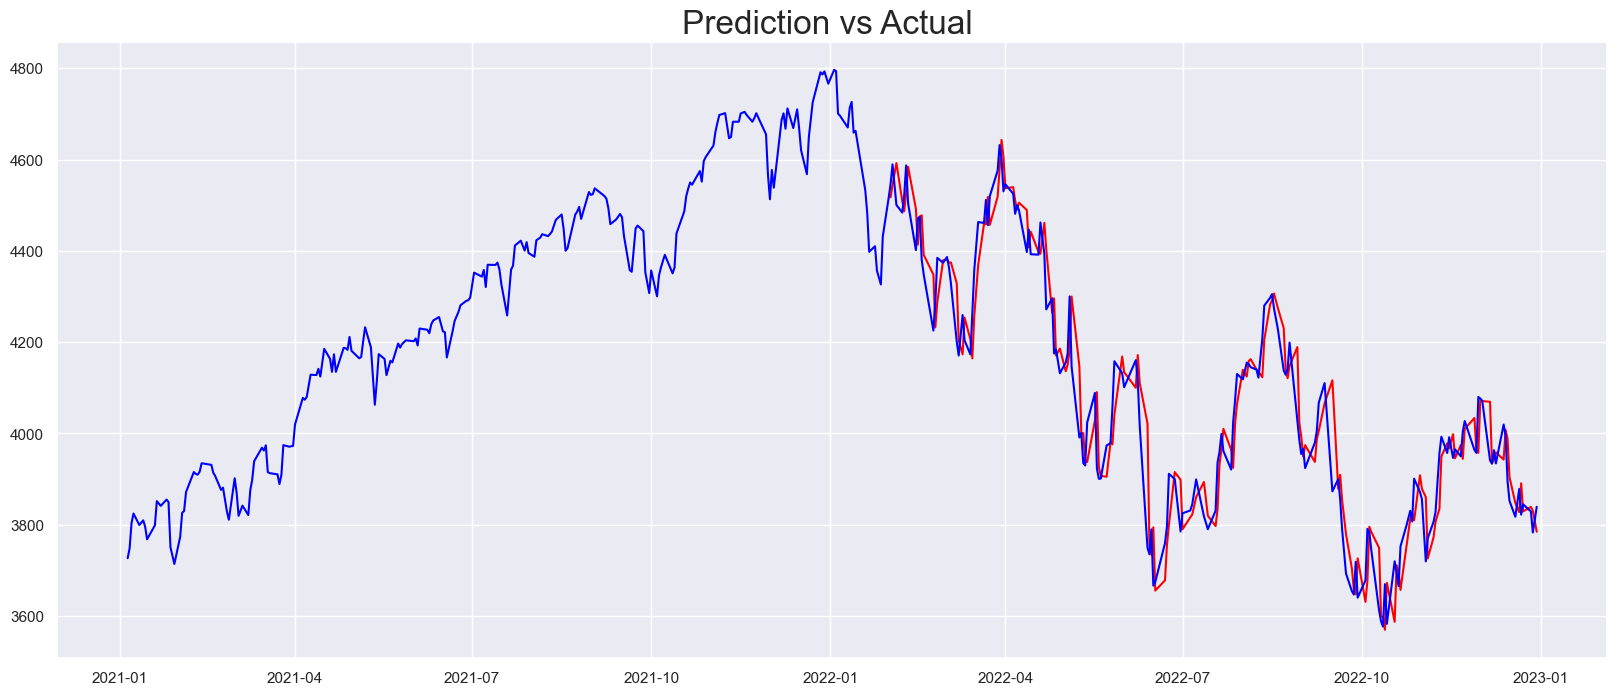

In [57]:
plt.rcParams['figure.figsize'] = (20,8)
plt.plot(model_predict[start_date:end_date], color = "red")
plt.plot(df1['close']["2021-01-01":end_date],color="blue")
plt.title("Prediction vs Actual ", size = 24)